# Deep Time Series - Comparative Aircraft Passenger Forecast

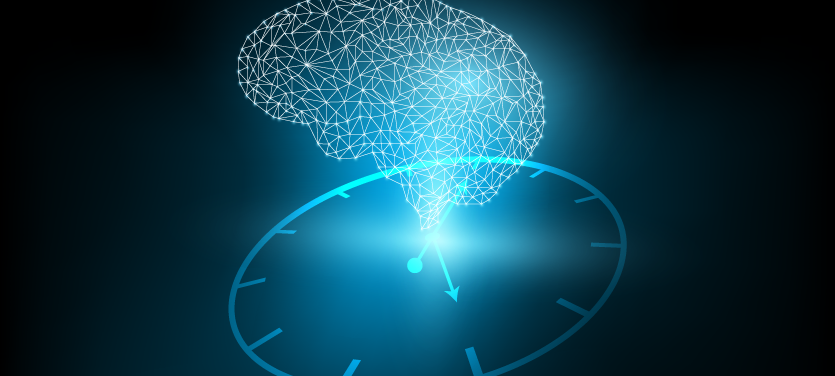

### Gerekli kütüphaneleri yükleme

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN
from sklearn.preprocessing import MinMaxScaler


### Veri setini yükleme

In [66]:
data = pd.read_csv('AirPassengers.csv')

### Veri setini görüntüleme

In [67]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### Sütun adını değiştirme

In [68]:
data.rename(columns={'#Passengers': 'passengers'}, inplace=True)

### Sadece 'passengers' sütununu kullanma

In [69]:
data = data['passengers']

### Veriyi normalize etme

In [70]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data.values.reshape(-1, 1))

### Eğitim ve test setlerini ayırma

In [71]:
train = data_normalized[:100, :]
test = data_normalized[100:, :]

### Veriyi hazırlama fonksiyonu

In [72]:
def get_data(data, steps):
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a = data[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(data[i+steps, 0])
    return np.array(dataX), np.array(dataY)

steps = 2

### Eğitim ve test verilerini oluşturma

In [73]:
X_train, y_train = get_data(train, steps)
X_test, y_test = get_data(test, steps)

### LSTM modeli oluşturma

In [74]:
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(1, steps)))
model_lstm.add(Dense(1, activation='linear'))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

### GRU modeli oluşturma

In [75]:
model_gru = Sequential()
model_gru.add(GRU(128, input_shape=(1, steps)))
model_gru.add(Dense(1, activation='linear'))
model_gru.compile(optimizer='adam', loss='mean_squared_error')

### SimpleRNN modeli oluşturma

In [76]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, input_shape=(1, steps)))
model_rnn.add(Dense(1, activation='linear'))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

### Veriyi uygun şekle getirme

In [77]:
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_train_gru = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_train_rnn = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

### LMST Modeli Eğitme

In [78]:
model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=8)


Epoch 1/50
13/13 [==============================] - 3s 4ms/step - loss: 0.0526
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0258
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0132
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0092
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0087
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0077
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0070
Epoch 8/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0063
Epoch 9/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 10/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 11/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 12/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 13/50
13/13 [==============================

### GRU Modeli Eğitme

In [79]:
model_gru.fit(X_train_gru, y_train, epochs=50, batch_size=8)


Epoch 1/50
13/13 [==============================] - 3s 4ms/step - loss: 0.0447
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0133
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0115
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0061
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 8/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0044
Epoch 9/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 10/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 11/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 12/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 13/50
13/13 [==============================

### SimpleRNN Modeli Eğitme

In [80]:
model_rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=8)


Epoch 1/50
13/13 [==============================] - 2s 3ms/step - loss: 0.0512
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 8/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 9/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 10/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 11/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 12/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 13/50
13/13 [==============================

### Test verisi için uygun şekle getirme

In [81]:
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_test_gru = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_test_rnn = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

### Tahminler

In [82]:
y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_gru = model_gru.predict(X_test_gru)
y_pred_rnn = model_rnn.predict(X_test_rnn)

2/2 [==============================] - 0s 5ms/step


### Geri Dönüştürme

In [83]:
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_pred_gru = scaler.inverse_transform(y_pred_gru)
y_pred_rnn = scaler.inverse_transform(y_pred_rnn)

### Gerçek Değerleri Geri Dönüştürme

In [84]:
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))


### Tahmin ve gerçek değerleri yazdırma

In [85]:
for i in range(len(y_test)):
    print(f"LMST - Gerçek Yolcu: {int(y_test_orig[i, 0])} - Tahmini Yolcu: {int(y_pred_lstm[i, 0])}")
    print(f"GRU - Gerçek Yolcu: {int(y_test_orig[i, 0])} - Tahmini Yolcu: {int(y_pred_gru[i, 0])}")
    print(f"SimpleRNN - Gerçek Yolcu: {int(y_test_orig[i, 0])} - Tahmini Yolcu: {int(y_pred_rnn[i, 0])}")
    if i < len(y_test) - 1:
        print()

LMST - Gerçek Yolcu: 465 - Tahmini Yolcu: 403
GRU - Gerçek Yolcu: 465 - Tahmini Yolcu: 400
SimpleRNN - Gerçek Yolcu: 465 - Tahmini Yolcu: 421

LMST - Gerçek Yolcu: 467 - Tahmini Yolcu: 455
GRU - Gerçek Yolcu: 467 - Tahmini Yolcu: 444
SimpleRNN - Gerçek Yolcu: 467 - Tahmini Yolcu: 458

LMST - Gerçek Yolcu: 404 - Tahmini Yolcu: 469
GRU - Gerçek Yolcu: 404 - Tahmini Yolcu: 451
SimpleRNN - Gerçek Yolcu: 404 - Tahmini Yolcu: 454

LMST - Gerçek Yolcu: 347 - Tahmini Yolcu: 423
GRU - Gerçek Yolcu: 347 - Tahmini Yolcu: 399
SimpleRNN - Gerçek Yolcu: 347 - Tahmini Yolcu: 386

LMST - Gerçek Yolcu: 305 - Tahmini Yolcu: 363
GRU - Gerçek Yolcu: 305 - Tahmini Yolcu: 343
SimpleRNN - Gerçek Yolcu: 305 - Tahmini Yolcu: 334

LMST - Gerçek Yolcu: 336 - Tahmini Yolcu: 317
GRU - Gerçek Yolcu: 336 - Tahmini Yolcu: 302
SimpleRNN - Gerçek Yolcu: 336 - Tahmini Yolcu: 297

LMST - Gerçek Yolcu: 340 - Tahmini Yolcu: 327
GRU - Gerçek Yolcu: 340 - Tahmini Yolcu: 323
SimpleRNN - Gerçek Yolcu: 340 - Tahmini Yolcu: 336


### Sonuçları Görselleştirme

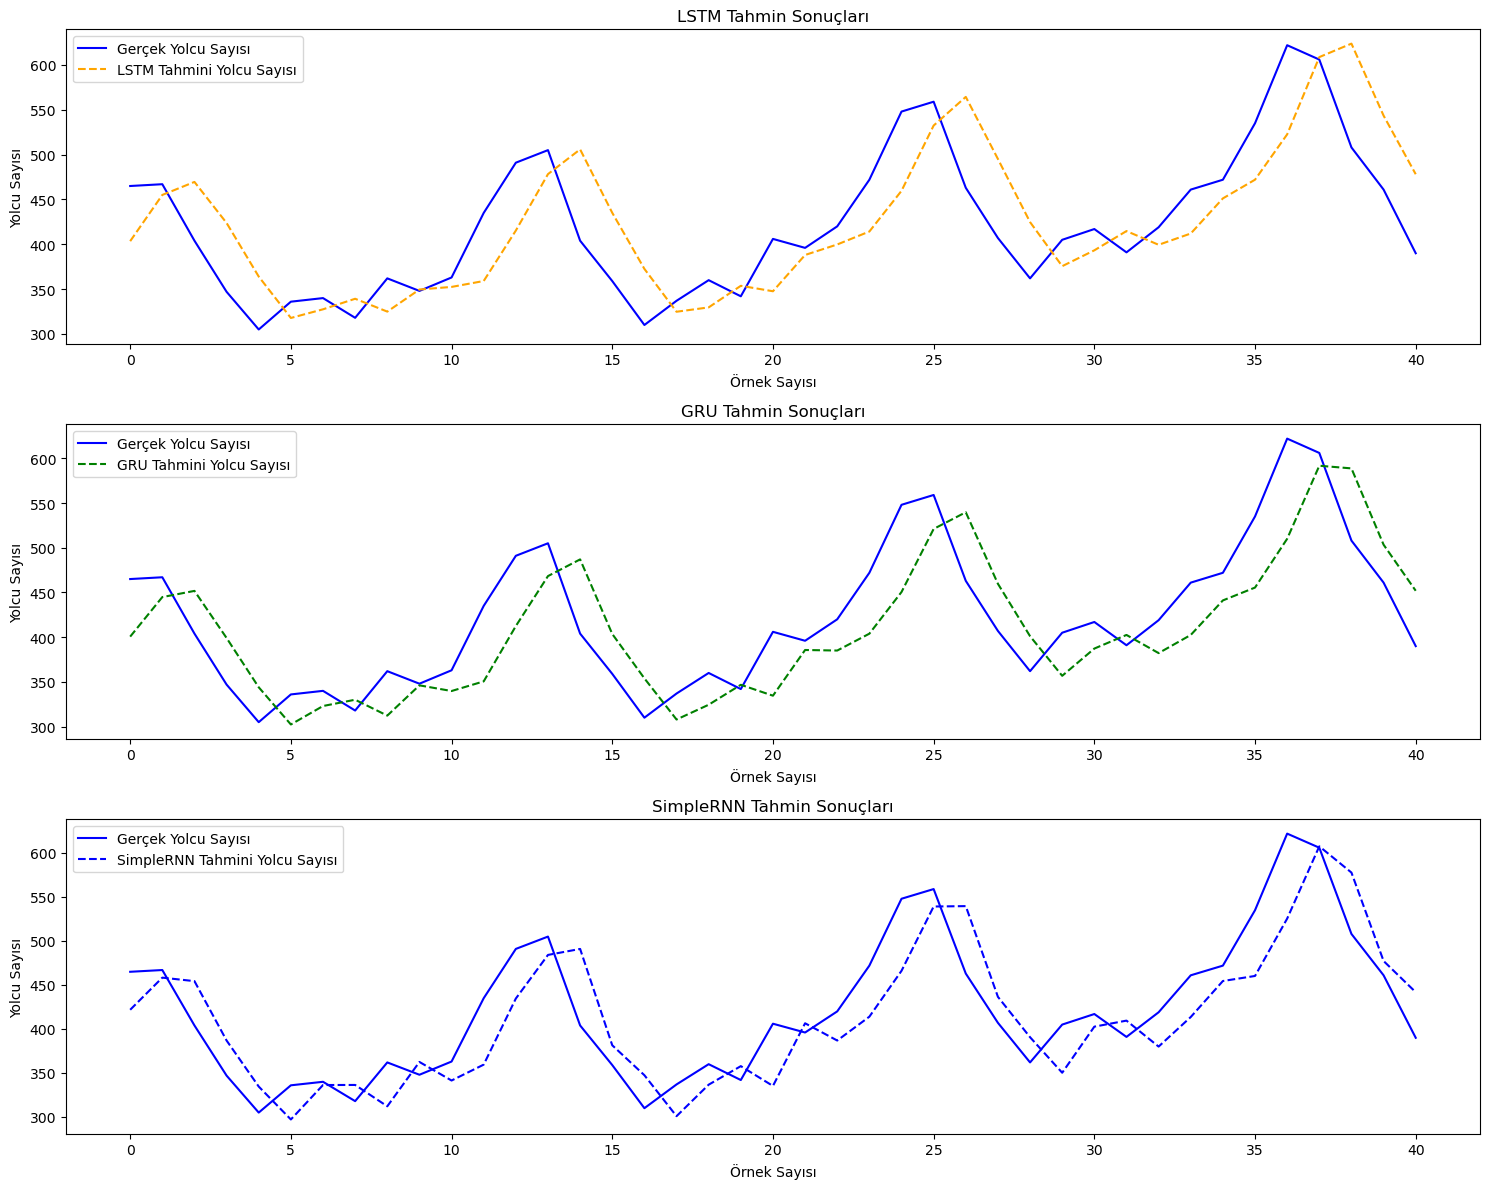

In [86]:
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.plot(y_test_orig, label='Gerçek Yolcu Sayısı', color='blue')
plt.plot(y_pred_lstm, label='LSTM Tahmini Yolcu Sayısı', color='orange', linestyle='dashed')
plt.xlabel('Örnek Sayısı')
plt.ylabel('Yolcu Sayısı')
plt.legend()
plt.title('LSTM Tahmin Sonuçları')

plt.subplot(3, 1, 2)
plt.plot(y_test_orig, label='Gerçek Yolcu Sayısı', color='blue')
plt.plot(y_pred_gru, label='GRU Tahmini Yolcu Sayısı', color='green', linestyle='dashed')
plt.xlabel('Örnek Sayısı')
plt.ylabel('Yolcu Sayısı')
plt.legend()
plt.title('GRU Tahmin Sonuçları')

plt.subplot(3, 1, 3)
plt.plot(y_test_orig, label='Gerçek Yolcu Sayısı', color='blue')
plt.plot(y_pred_rnn, label='SimpleRNN Tahmini Yolcu Sayısı', color='blue', linestyle='dashed')
plt.xlabel('Örnek Sayısı')
plt.ylabel('Yolcu Sayısı')
plt.legend()
plt.title('SimpleRNN Tahmin Sonuçları')

plt.tight_layout()
plt.show()


### Hataları hesaplama

In [87]:
error_lstm = np.abs(y_test_orig - y_pred_lstm.flatten())
error_gru = np.abs(y_test_orig - y_pred_gru.flatten())
error_rnn = np.abs(y_test_orig - y_pred_rnn.flatten())

### Ortalama hataları yazdırma

In [88]:
print("Ortalama Hata - LSTM:", np.mean(error_lstm))
print("Ortalama Hata - GRU:", np.mean(error_gru))
print("Ortalama Hata - SimpleRNN:", np.mean(error_rnn))

Ortalama Hata - LSTM: 87.52693830736331
Ortalama Hata - GRU: 85.71195454685409
Ortalama Hata - SimpleRNN: 86.10573070010992


### En iyi ve en kötü tahmin yapan modelleri bulma

In [89]:
best_model = min({"LSTM": np.mean(error_lstm), "GRU": np.mean(error_gru), "SimpleRNN": np.mean(error_rnn)}, key={"LSTM": np.mean(error_lstm), "GRU": np.mean(error_gru), "SimpleRNN": np.mean(error_rnn)}.get)

worst_model = max({"LSTM": np.mean(error_lstm), "GRU": np.mean(error_gru), "SimpleRNN": np.mean(error_rnn)}, key={"LSTM": np.mean(error_lstm), "GRU": np.mean(error_gru), "SimpleRNN": np.mean(error_rnn)}.get)

print("\nEn İyi Tahmin Yapan Model:", best_model)
print("En Kötü Tahmin Yapan Model:", worst_model)


En İyi Tahmin Yapan Model: GRU
En Kötü Tahmin Yapan Model: LSTM
